In [102]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [103]:
data = pd.read_excel('C:\\Users\\LENOVO\\Desktop\\RATINGS PROJECT.xlsx')
data

,Unnamed: 0,SITE NAME,PRODUCT NAME,RIVEWS,RATINGS
0,0,Amazon,Keyboard,Good,NaN
1,1,Amazon,Keyboard,Good,4.0
2,2,Amazon,Keyboard,Keys are not working,3.0
3,3,Amazon,Keyboard,Meh,3.0
4,4,Amazon,Keyboard,Nice,3.0
...,...,...,...,...,...
20195,20195,Flipkart,Smart Watch,An excellent laptop.,5.0
20196,20196,Flipkart,Smart Watch,Must buy!,5.0
20197,20197,Flipkart,Smart Watch,Super!,5.0
20198,20198,Flipkart,Smart Watch,Good choice,4.0


In [104]:
data.isnull().sum()

Unnamed: 0         0
SITE NAME          0
PRODUCT NAME       0
RIVEWS             0
RATINGS         3452
dtype: int64

In [105]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20200 entries, 0 to 20199
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    20200 non-null  int64  
 1   SITE NAME     20200 non-null  object 
 2   PRODUCT NAME  20200 non-null  object 
 3   RIVEWS        20200 non-null  object 
 4   RATINGS       16748 non-null  float64
dtypes: float64(1), int64(1), object(3)
memory usage: 789.2+ KB


In [106]:
data['RATINGS'] = data['RATINGS'].replace(np.nan,3.0)

In [107]:
data.isnull().sum()

Unnamed: 0      0
SITE NAME       0
PRODUCT NAME    0
RIVEWS          0
RATINGS         0
dtype: int64

<AxesSubplot:xlabel='RATINGS', ylabel='count'>

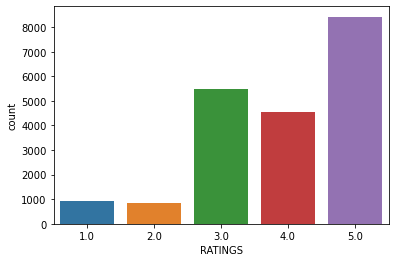

In [108]:
sns.countplot(x='RATINGS', data= data)

In [109]:
data.describe()

,Unnamed: 0,RATINGS
count,20200.000000,20200.000000
mean,10099.500000,3.925000
std,5831.382055,1.123349
min,0.000000,1.000000
25%,5049.750000,3.000000
50%,10099.500000,4.000000
75%,15149.250000,5.000000
max,20199.000000,5.000000


In [110]:
data.shape

(20200, 5)

In [111]:
data.drop(['Unnamed: 0'],axis=1,inplace=True)

In [112]:
data.shape

(20200, 4)

In [113]:
data['SITE NAME'] = data['SITE NAME'].replace('FLIPKART','Flipkart')

<AxesSubplot:xlabel='SITE NAME', ylabel='count'>

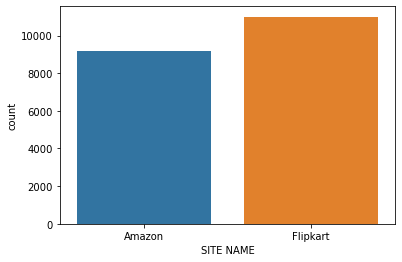

In [114]:
sns.countplot(x='SITE NAME',data=data)

Data is more from Flipkart site

<AxesSubplot:xlabel='PRODUCT NAME', ylabel='count'>

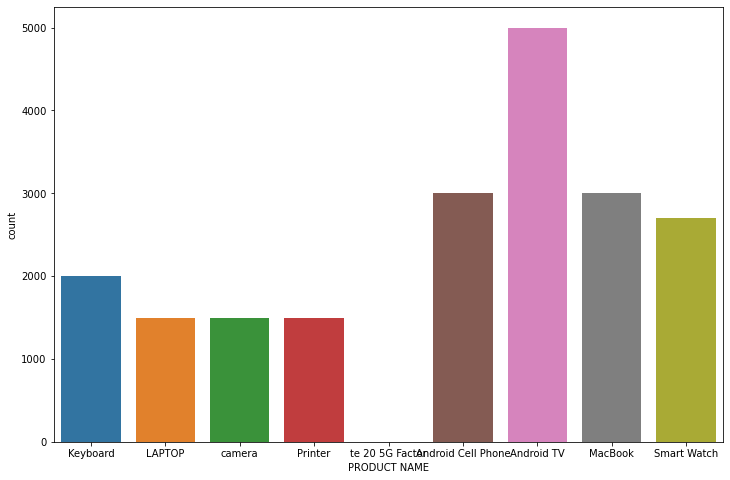

In [115]:
plt.figure(figsize=(12,8))
sns.countplot(x='PRODUCT NAME',data=data)

These are the Product names for which the ratings and riviews are provided

In [116]:
from nltk.stem import WordNetLemmatizer
import nltk
from nltk.corpus import  stopwords
import string

In [117]:
data['length'] = data['RIVEWS'].str.len()
data.head(7)

,SITE NAME,PRODUCT NAME,RIVEWS,RATINGS,length
0,Amazon,Keyboard,Good,3.0,4
1,Amazon,Keyboard,Good,4.0,4
2,Amazon,Keyboard,Keys are not working,3.0,20
3,Amazon,Keyboard,Meh,3.0,3
4,Amazon,Keyboard,Nice,3.0,4
5,Amazon,Keyboard,"Good one for the Price, Go for it.",4.0,34
6,Amazon,Keyboard,Value for money,3.0,15


In [118]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [119]:
# Convert all messages to lower case
data['RIVEWS'] = data['RIVEWS'].str.lower()

In [120]:
# Replace email addresses with 'email'
data['RIVEWS'] = data['RIVEWS'].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$','emailaddress')

In [121]:
# Replace URLs with 'webaddress'
data['RIVEWS'] = data['RIVEWS'].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$','webaddress')

In [122]:
# Replace money symbols with 'moneysymb' (£ can by typed with ALT key + 156)
data['RIVEWS'] = data['RIVEWS'].str.replace(r'£|\$', 'dollers')

In [123]:
# Replace 10 digit phone numbers (formats include paranthesis, spaces, no spaces, dashes) with 'phonenumber'
data['RIVEWS'] = data['RIVEWS'].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$','phonenumber')

In [124]:
# Replace numbers with 'numbr'
data['RIVEWS'] = data['RIVEWS'].str.replace(r'\d+(\.\d+)?', 'numbr')

In [125]:
# Remove Punctuations

data['RIVEWS'] = data['RIVEWS'].apply(lambda x: ' '.join(term for term in x.split() if term not in string.punctuation))

In [126]:
stop_words = set(stopwords.words('english') + ['u', 'ü', 'ur', '4', '2', 'im', 'dont', 'doin', 'ure'])

In [127]:
# Remove Stopwords

data['RIVEWS'] = data['RIVEWS'].apply(lambda x: ' '.join(term for term in x.split() if term not in stop_words))

In [128]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [129]:
lem=WordNetLemmatizer()

data['RIVEWS'] = data['RIVEWS'].apply(lambda x: ' '.join(lem.lemmatize(t) for t in x.split()))

In [130]:
data['clear_length'] = data.RIVEWS.str.len()
data.head()

,SITE NAME,PRODUCT NAME,RIVEWS,RATINGS,length,clear_length
0,Amazon,Keyboard,good,3.0,4,4
1,Amazon,Keyboard,good,4.0,4,4
2,Amazon,Keyboard,key working,3.0,20,11
3,Amazon,Keyboard,meh,3.0,3,3
4,Amazon,Keyboard,nice,3.0,4,4


In [131]:
# Total length removal
print ('Origian Length', data.length.sum())
print ('Clear lenght', data.clear_length.sum())

Origian Length 472800
Clear lenght 392620


In [132]:
!pip install wordcloud

In [133]:
from wordcloud import WordCloud

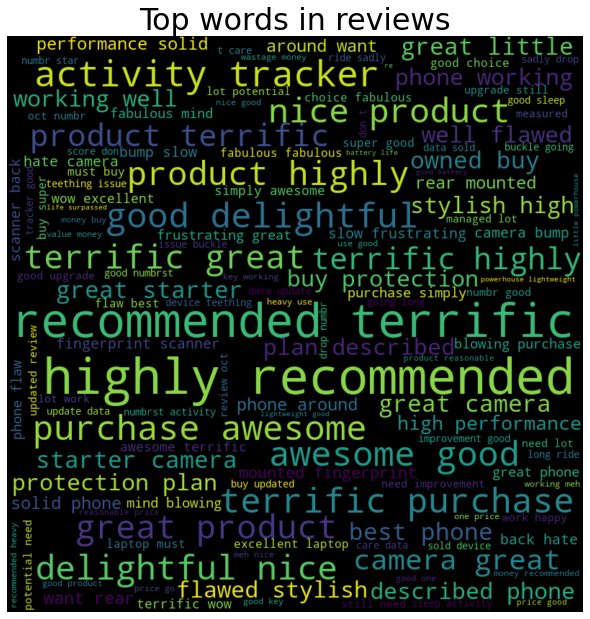

In [134]:
def wordCloud_generator(data, title=None):
    wordcloud = WordCloud(width = 800, height = 800,
                          background_color ='black',
                          min_font_size = 10
                         ).generate(" ".join(data.values))                      
    plt.figure(figsize = (8, 8), facecolor = None) 
    plt.imshow(wordcloud, interpolation='bilinear') 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 
    plt.title(title,fontsize=30)
    plt.show()
wordCloud_generator(data['RIVEWS'], title="Top words in reviews")

In [135]:
# lets make object data into int

In [136]:
from sklearn.preprocessing import LabelEncoder

In [137]:
le = LabelEncoder()
var_mode = ['SITE NAME','PRODUCT NAME']

for i in var_mode:
    data[i] = le.fit_transform(data[i])

In [138]:
data.describe()

,SITE NAME,PRODUCT NAME,RATINGS,length,clear_length
count,20200.000000,20200.000000,20200.000000,20200.000000,20200.000000
mean,0.544554,2.955545,3.925000,23.405941,19.436634
std,0.498023,2.293786,1.123349,17.752432,14.155133
min,0.000000,0.000000,1.000000,3.000000,3.000000
25%,0.000000,1.000000,3.000000,10.000000,9.000000
50%,1.000000,3.000000,4.000000,20.000000,17.000000
75%,1.000000,5.000000,5.000000,29.000000,24.000000
max,1.000000,8.000000,5.000000,96.000000,84.000000


In [139]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,roc_curve,roc_auc_score,auc
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score,GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [141]:
#  Convert text into vectors using TF-IDF

from sklearn.feature_extraction.text import TfidfVectorizer
tf_vec = TfidfVectorizer(max_features = 10000, stop_words='english')
features = tf_vec.fit_transform(data['RIVEWS'])
x = features

In [143]:
naive = MultinomialNB()

In [142]:
y = data['RATINGS']

In [144]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=56,test_size=.30)


# MULTINOMIALNB

In [146]:
naive.fit(x_train,y_train)

MultinomialNB()

In [153]:
y_pred = naive.predict(x_test)
print("final score => ",accuracy_score(y_test,y_pred))

conf_mat = confusion_matrix(y_test,y_pred)

final score =>  0.665016501650165


In [154]:
conf_mat

array([[   5,   10,  122,   43,   89],
       [  10,   17,  107,   96,   18],
       [  34,   57, 1007,  439,  122],
       [  32,   12,  236,  942,  102],
       [   9,   26,  303,  163, 2059]], dtype=int64)

# LOGISTIC REGRESSION

In [148]:

LG = LogisticRegression(C=1, max_iter = 3000)

LG.fit(x_train, y_train)

y_pred_train = LG.predict(x_train)
print('Training accuracy is {}'.format(accuracy_score(y_train, y_pred_train)))
y_pred_test = LG.predict(x_test)
print('Test accuracy is {}'.format(accuracy_score(y_test,y_pred_test)))
print(confusion_matrix(y_test,y_pred_test))
print(classification_report(y_test,y_pred_test))

Training accuracy is 0.692079207920792
Test accuracy is 0.6919141914191419
[[   0    0  120   42  107]
 [   0    0  138   98   12]
 [   0    0 1245  297  117]
 [   0    0  349  880   95]
 [   0    0  362  130 2068]]
              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00       269
         2.0       0.00      0.00      0.00       248
         3.0       0.56      0.75      0.64      1659
         4.0       0.61      0.66      0.64      1324
         5.0       0.86      0.81      0.83      2560

    accuracy                           0.69      6060
   macro avg       0.41      0.44      0.42      6060
weighted avg       0.65      0.69      0.67      6060



# DECISION TREE CLASSIFIER

In [149]:

DT = DecisionTreeClassifier()

DT.fit(x_train, y_train)
y_pred_train = DT.predict(x_train)
print('Training accuracy is {}'.format(accuracy_score(y_train, y_pred_train)))
y_pred_test = DT.predict(x_test)
print('Test accuracy is {}'.format(accuracy_score(y_test,y_pred_test)))
print(confusion_matrix(y_test,y_pred_test))
print(classification_report(y_test,y_pred_test))

Training accuracy is 0.692079207920792
Test accuracy is 0.6919141914191419
[[   0    0  120   42  107]
 [   0    0  138   98   12]
 [   0    0 1245  297  117]
 [   0    0  349  880   95]
 [   0    0  362  130 2068]]
              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00       269
         2.0       0.00      0.00      0.00       248
         3.0       0.56      0.75      0.64      1659
         4.0       0.61      0.66      0.64      1324
         5.0       0.86      0.81      0.83      2560

    accuracy                           0.69      6060
   macro avg       0.41      0.44      0.42      6060
weighted avg       0.65      0.69      0.67      6060



# RANDOM FOREST CLASSIFIER

In [150]:

RF = RandomForestClassifier()

RF.fit(x_train, y_train)
y_pred_train = RF.predict(x_train)
print('Training accuracy is {}'.format(accuracy_score(y_train, y_pred_train)))
y_pred_test = RF.predict(x_test)
print('Test accuracy is {}'.format(accuracy_score(y_test,y_pred_test)))
print(confusion_matrix(y_test,y_pred_test))
print(classification_report(y_test,y_pred_test))

Training accuracy is 0.692008486562942
Test accuracy is 0.6919141914191419
[[   0    0  120   42  107]
 [   0    0  146   90   12]
 [   0    0 1275  267  117]
 [   0    0  379  850   95]
 [   0    0  375  117 2068]]
              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00       269
         2.0       0.00      0.00      0.00       248
         3.0       0.56      0.77      0.64      1659
         4.0       0.62      0.64      0.63      1324
         5.0       0.86      0.81      0.83      2560

    accuracy                           0.69      6060
   macro avg       0.41      0.44      0.42      6060
weighted avg       0.65      0.69      0.67      6060



# GRADIENT BOOSTING CLASSIFIER

In [151]:

grd=GradientBoostingClassifier(n_estimators=20)
grd.fit(x_train, y_train)
y_pred_train = grd.predict(x_train)
print('Training accuracy is {}'.format(accuracy_score(y_train, y_pred_train)))
y_pred_test = grd.predict(x_test)
print('Test accuracy is {}'.format(accuracy_score(y_test,y_pred_test)))
print(confusion_matrix(y_test,y_pred_test))
print(classification_report(y_test,y_pred_test))

Training accuracy is 0.621004243281471
Test accuracy is 0.6257425742574257
[[   0    0   30    0  239]
 [   0    0   45    0  203]
 [   0    0  703   60  896]
 [   0    0  139  618  567]
 [   0    0   89    0 2471]]
              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00       269
         2.0       0.00      0.00      0.00       248
         3.0       0.70      0.42      0.53      1659
         4.0       0.91      0.47      0.62      1324
         5.0       0.56      0.97      0.71      2560

    accuracy                           0.63      6060
   macro avg       0.43      0.37      0.37      6060
weighted avg       0.63      0.63      0.58      6060



In [155]:
from sklearn.model_selection import GridSearchCV

In [156]:
parameters = {'max_depth':range(2,4),'min_samples_leaf':range(2,4),'min_samples_split':range(2,4),'n_estimators':[20,30,60,80]}

clf = GridSearchCV(RF,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 80}


In [157]:
rf = RandomForestClassifier(max_depth= 2, min_samples_leaf=2, min_samples_split= 3, n_estimators= 20)

In [158]:
rf.fit(x_train,y_train)

RandomForestClassifier(max_depth=2, min_samples_leaf=2, min_samples_split=3,
                       n_estimators=20)

In [159]:
y_pred = rf.predict(x_test)

In [160]:
cfm = confusion_matrix(y_test,y_pred)
cfm

array([[   0,    0,    0,    0,  269],
       [   0,    0,    0,    0,  248],
       [   0,    0,    0,    0, 1659],
       [   0,    0,    0,   84, 1240],
       [   0,    0,    0,    0, 2560]], dtype=int64)

In [161]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00       269
         2.0       0.00      0.00      0.00       248
         3.0       0.00      0.00      0.00      1659
         4.0       1.00      0.06      0.12      1324
         5.0       0.43      1.00      0.60      2560

    accuracy                           0.44      6060
   macro avg       0.29      0.21      0.14      6060
weighted avg       0.40      0.44      0.28      6060



In [162]:
print("ACCURACY",accuracy_score(y_test,y_pred))

ACCURACY 0.4363036303630363


So after hypertuning its accuracy score decreases

# HENCE MY MODEL IS READY TO PREDICT